# Mô tả & Tiền xử lý

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

df = pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [2]:
df.shape
# 8124 hàng, 23 cột

(8124, 23)

In [3]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [4]:
df.isnull().sum()
# Không có dữ liệu null

,0
class,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0


In [5]:
df.duplicated()
# Không có dữ liệu trùng

,0
0,False
1,False
2,False
3,False
4,False
...,...
8119,False
8120,False
8121,False
8122,False


In [6]:
df.nunique()
# Cột veil-type có duy nhất 1 giá trị => có thể bỏ mà không ảnh hưởng kết quả mô hình

,0
class,2
cap-shape,6
cap-surface,4
cap-color,10
bruises,2
odor,9
gill-attachment,2
gill-spacing,2
gill-size,2
gill-color,12


In [7]:
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])

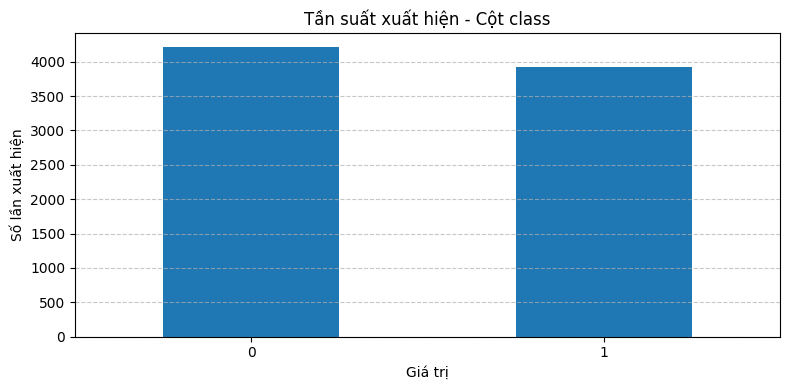

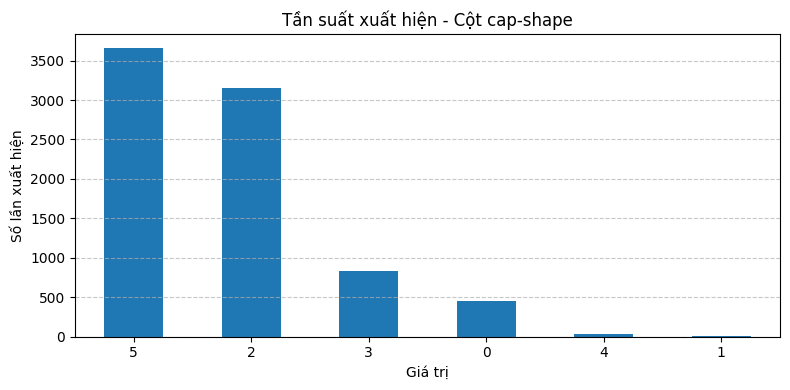

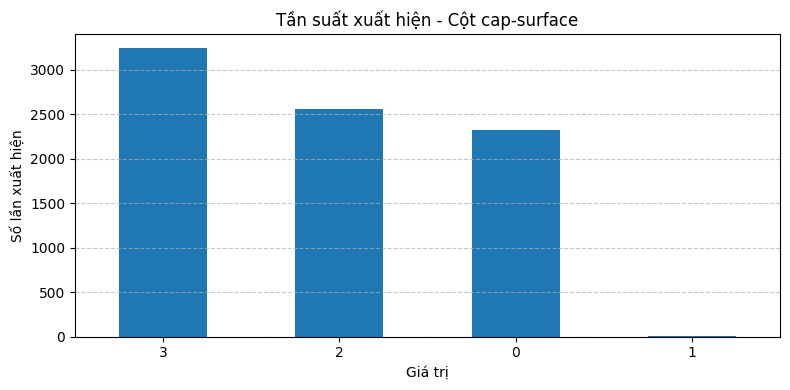

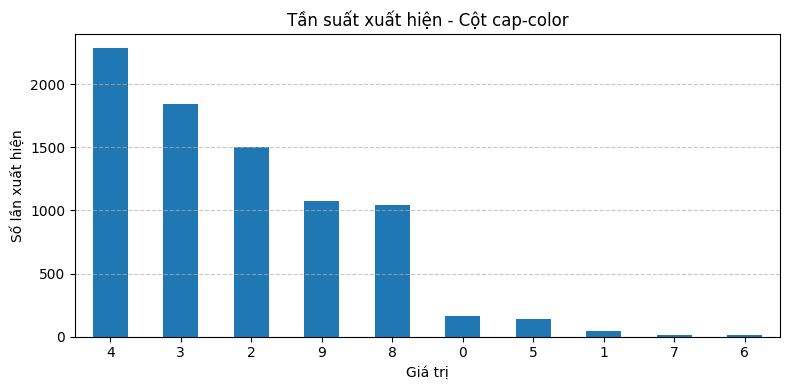

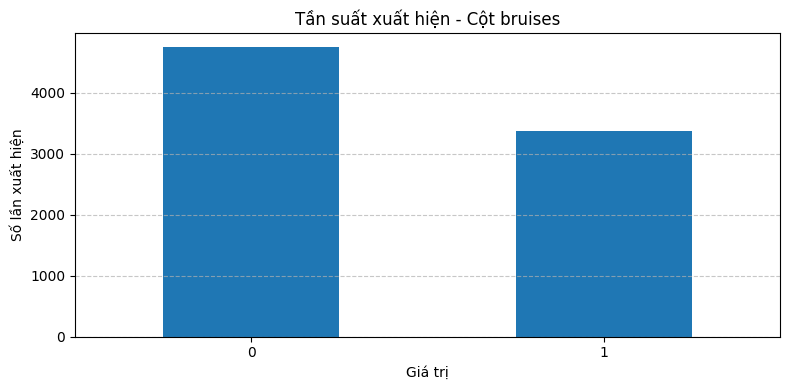

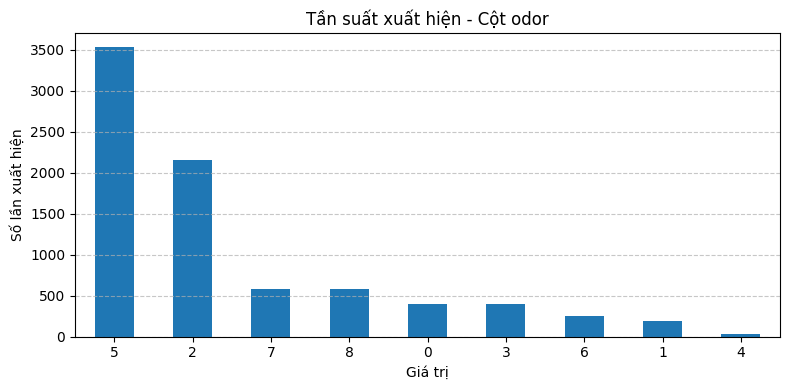

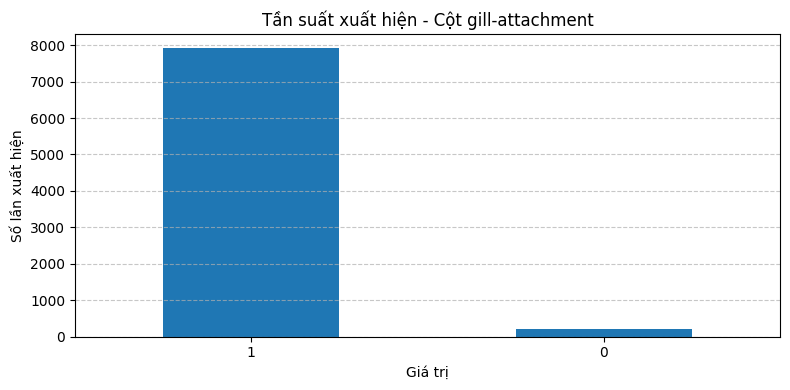

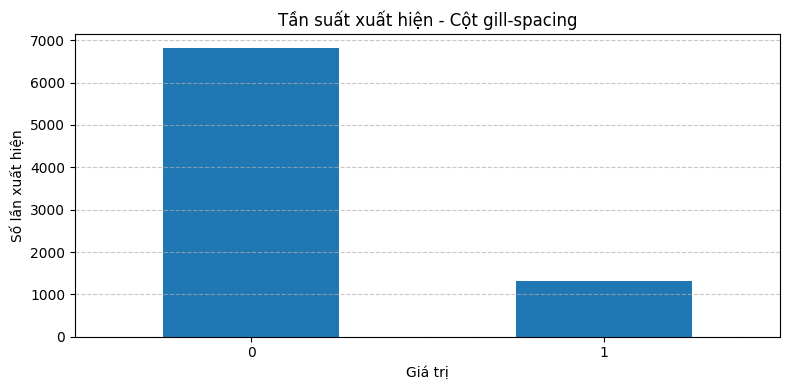

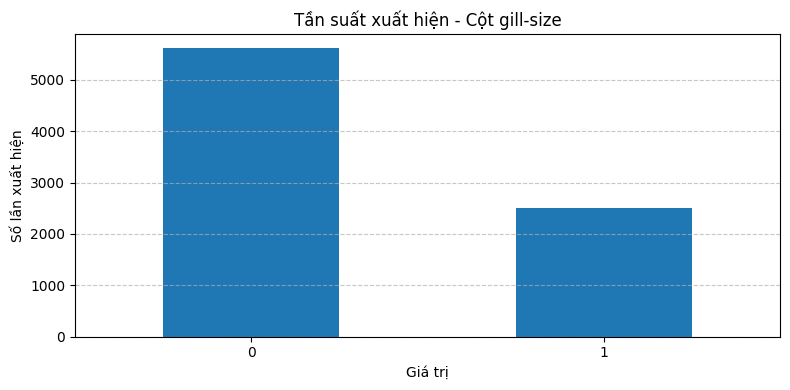

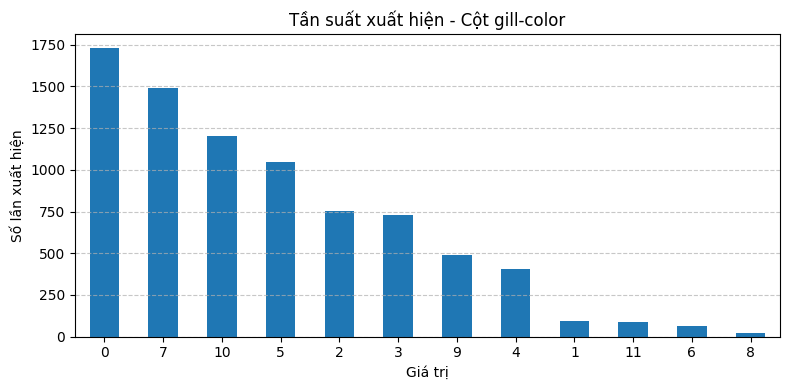

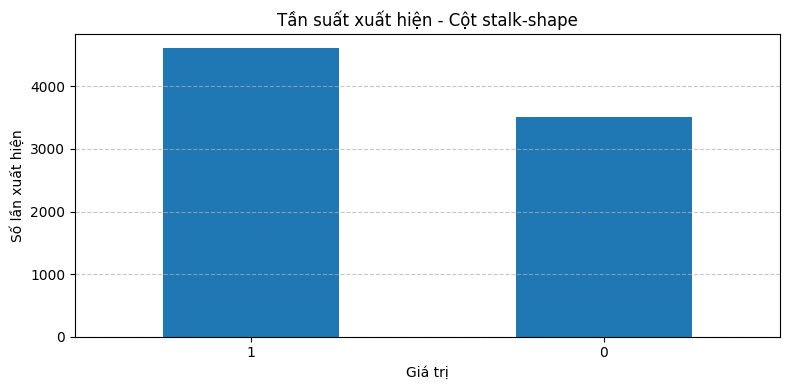

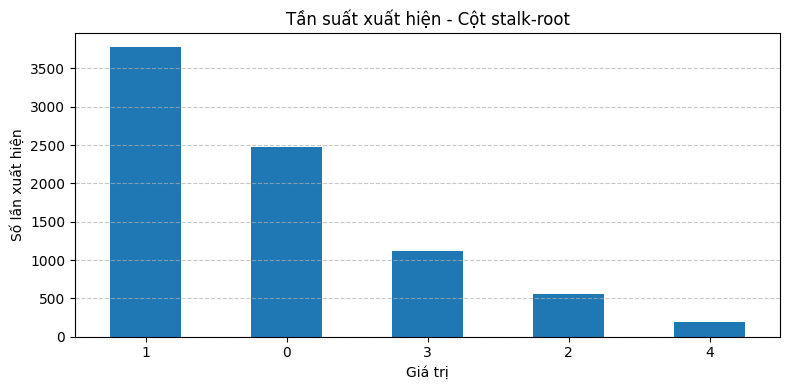

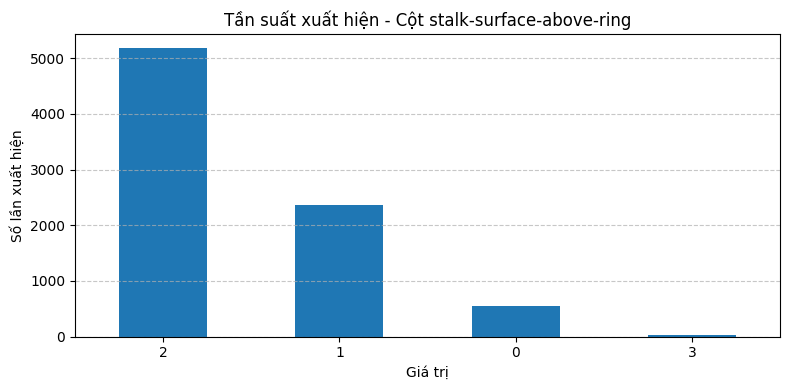

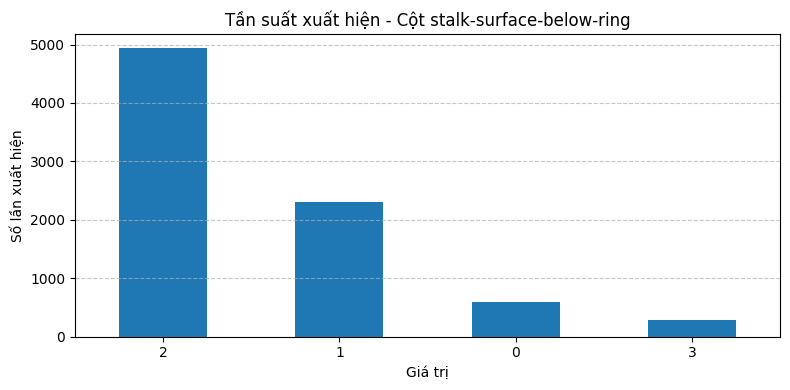

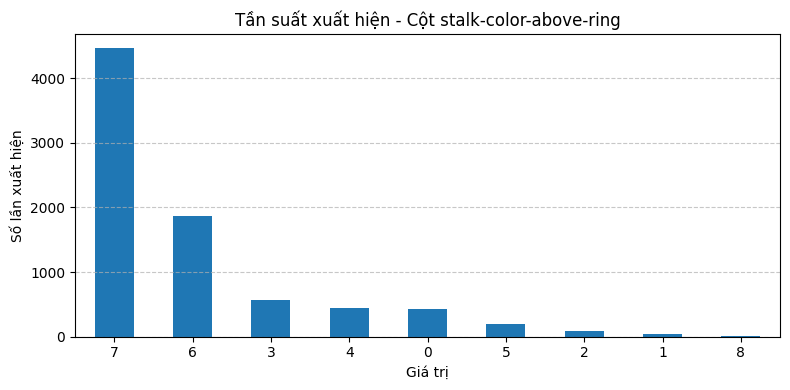

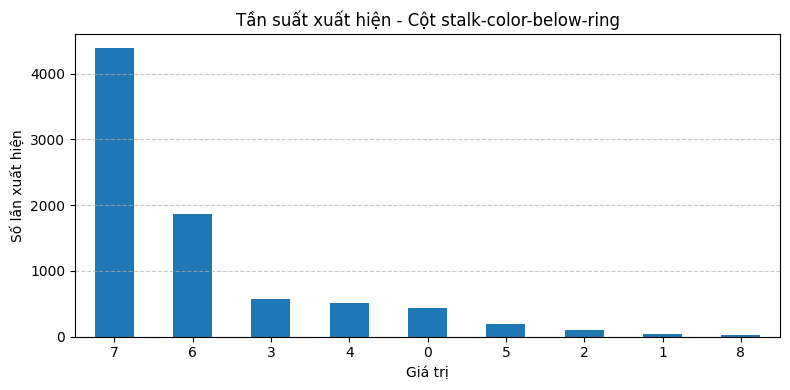

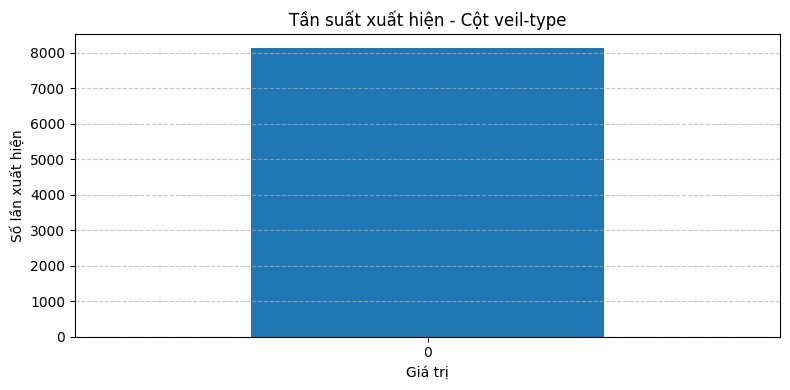

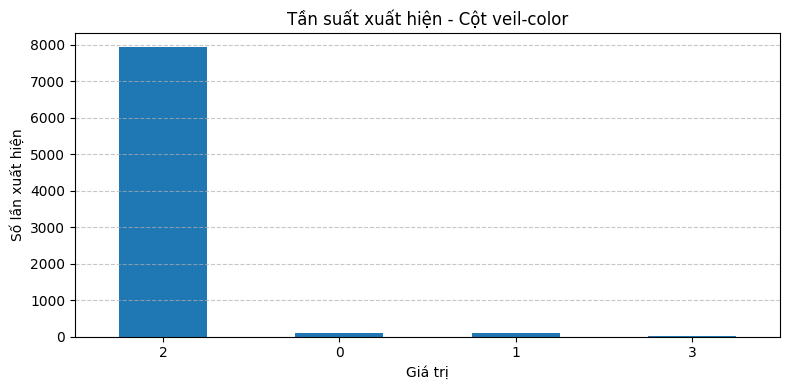

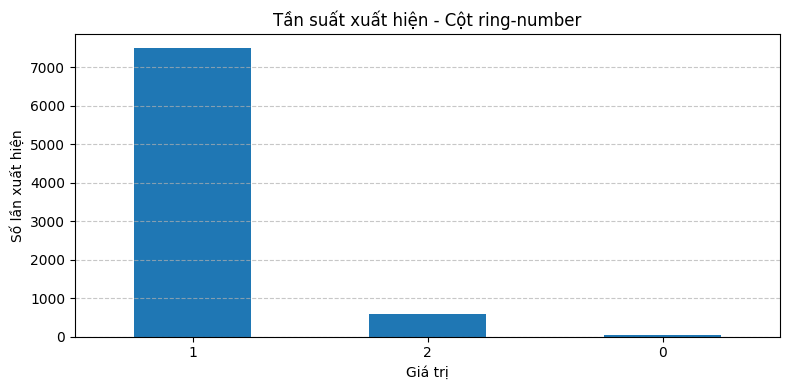

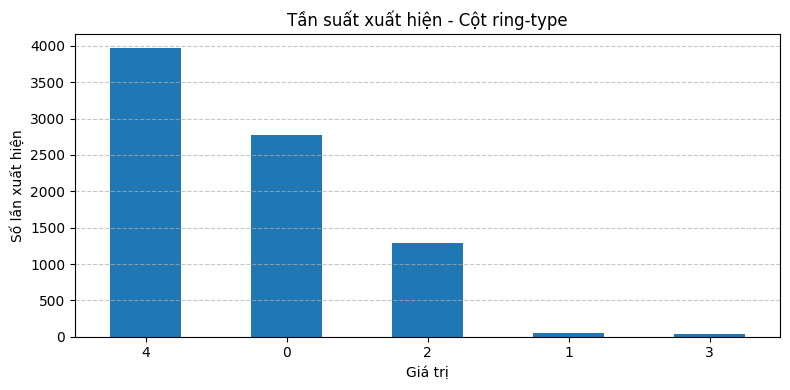

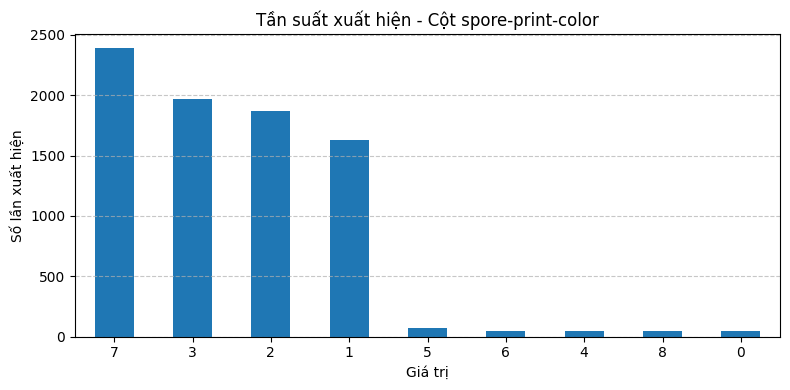

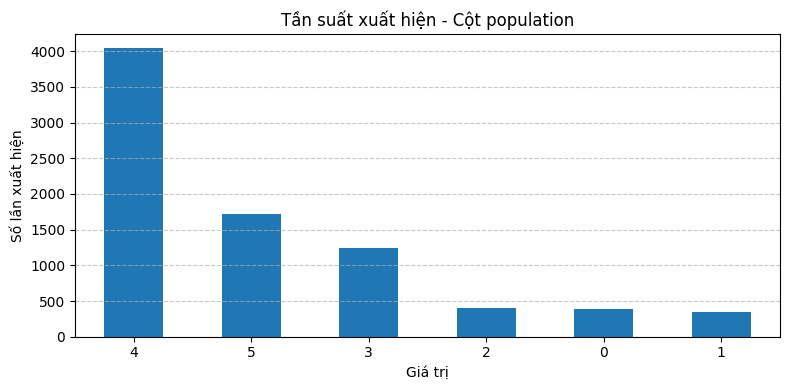

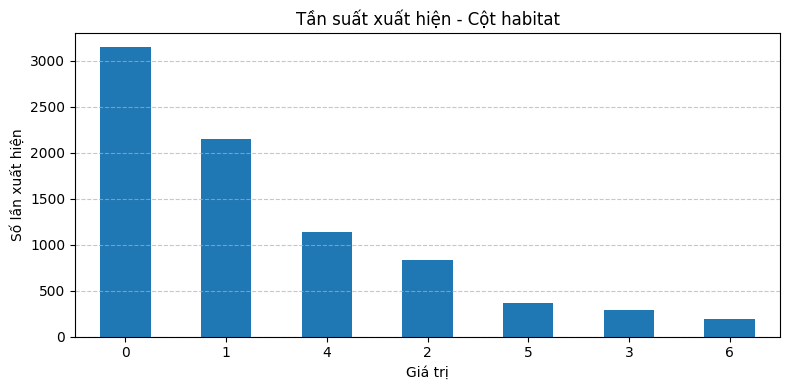

In [8]:
for cols in df.columns:
    plt.figure(figsize=(8,4))
    df[cols].value_counts().plot(kind='bar')
    plt.title(f'Tần suất xuất hiện - Cột {cols}')
    plt.xlabel('Giá trị')
    plt.ylabel('Số lần xuất hiện')
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

In [9]:
df = df.drop(columns = ['veil-type'])

In [10]:
df['class'].value_counts()
# Cột nhãn khá cân bằng

,count
class,
0,4208
1,3916


# Chia train, validation, test

In [11]:
X = df.drop(columns=['class'])
y = df['class']

In [12]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=1/3, random_state=42, stratify=y_temp)
X_train.shape, X_val.shape, X_test.shape

((5686, 21), (813, 21), (1625, 21))

In [13]:
# smote = SMOTE(random_state=42)
# X_train, y_train = smote.fit_resample(X_train, y_train)

In [14]:
ros = RandomOverSampler(random_state=42)
X_train, y_train = ros.fit_resample(X_train, y_train)

xgb_model = xgb.XGBClassifier(random_state=42, scale_pos_weight=1)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

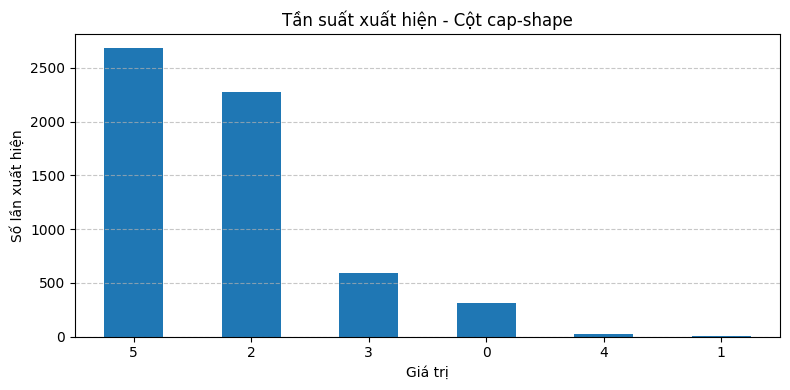

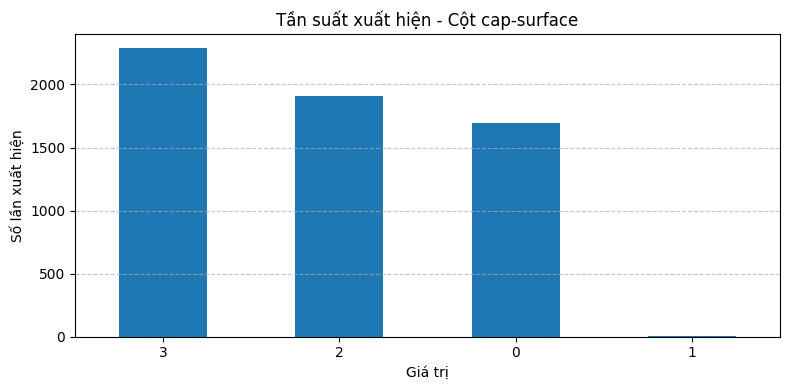

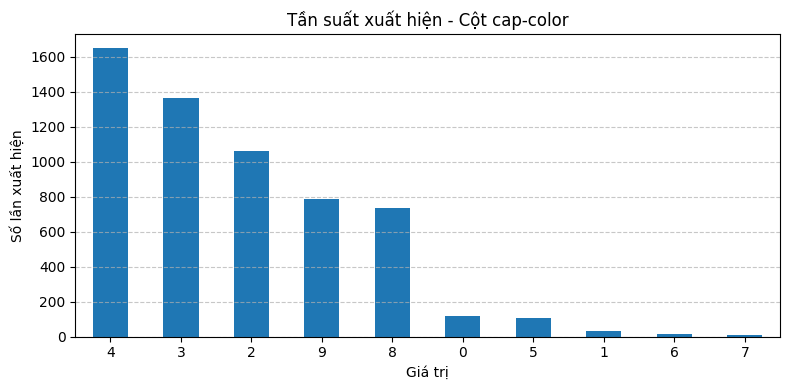

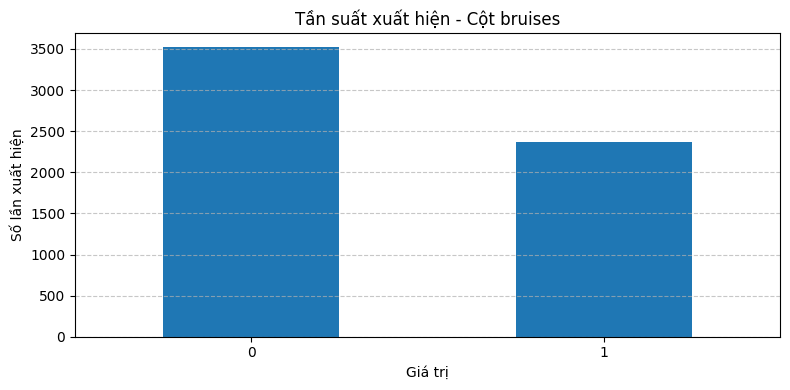

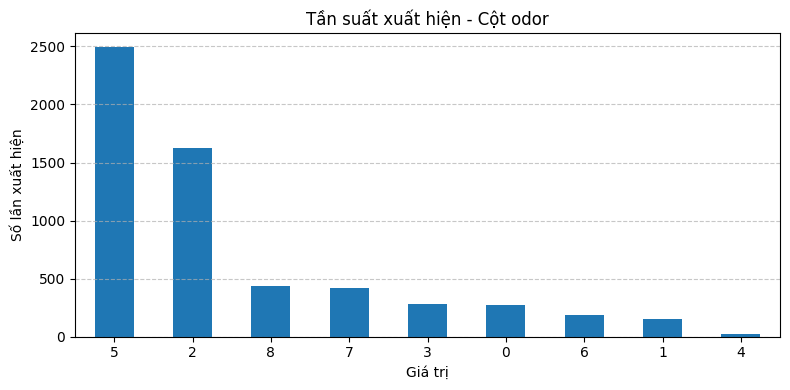

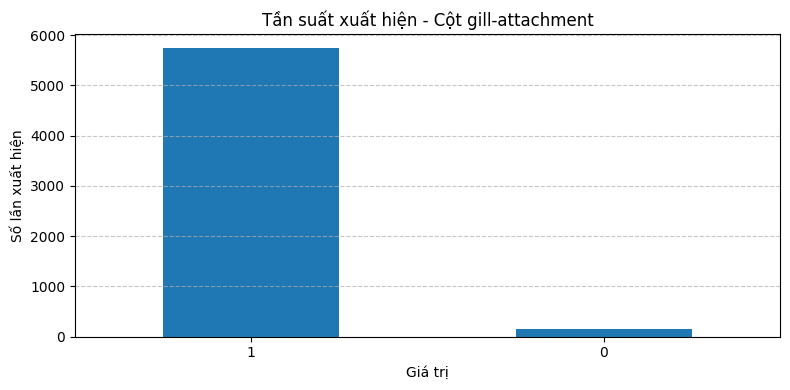

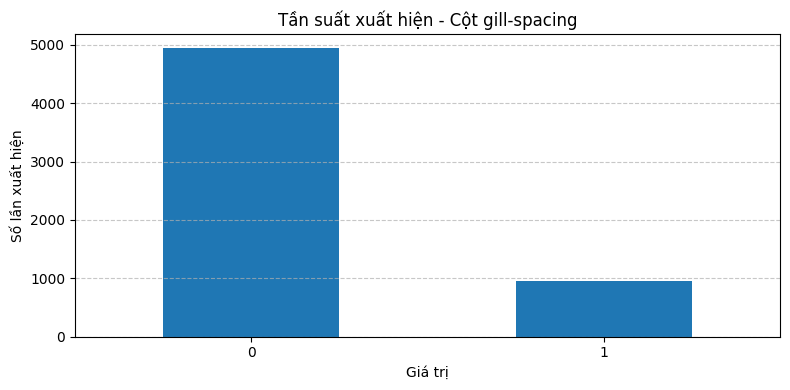

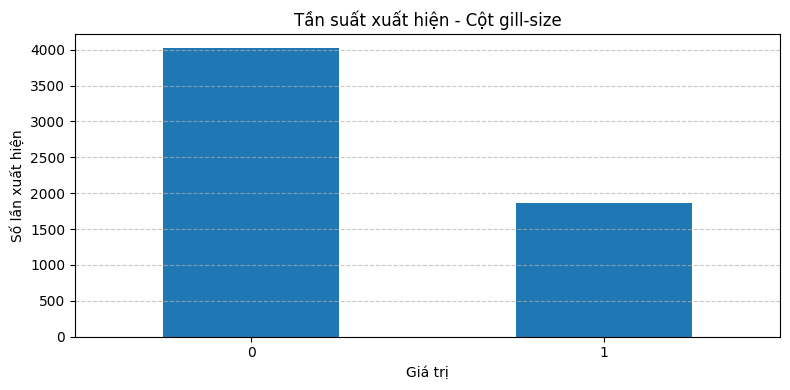

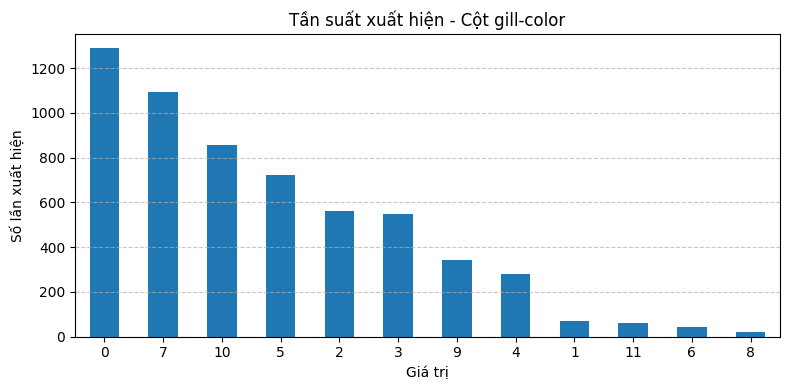

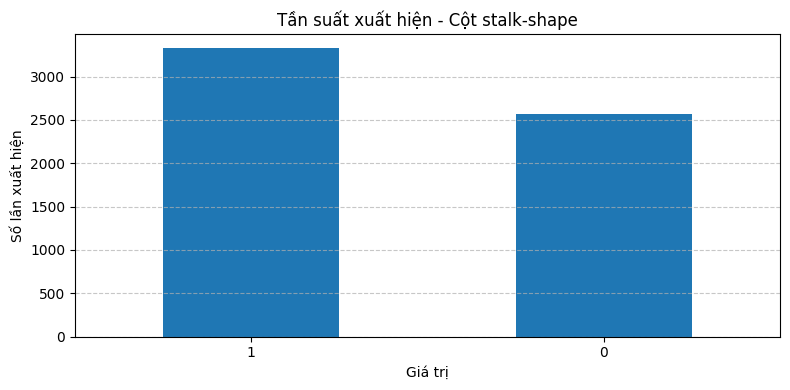

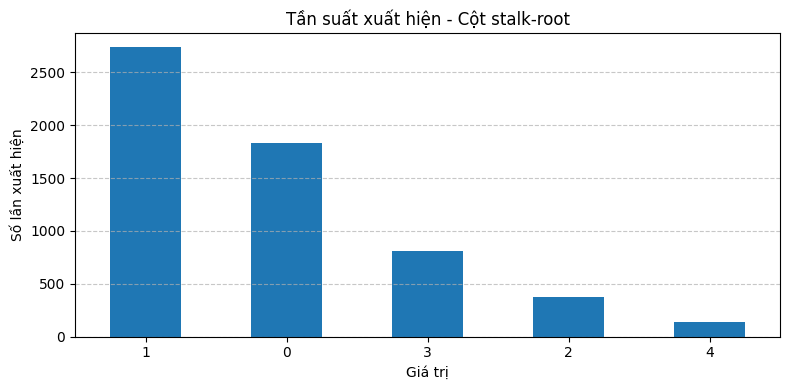

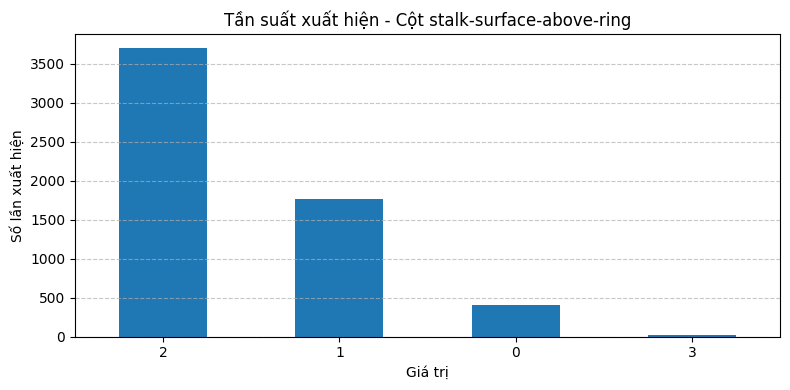

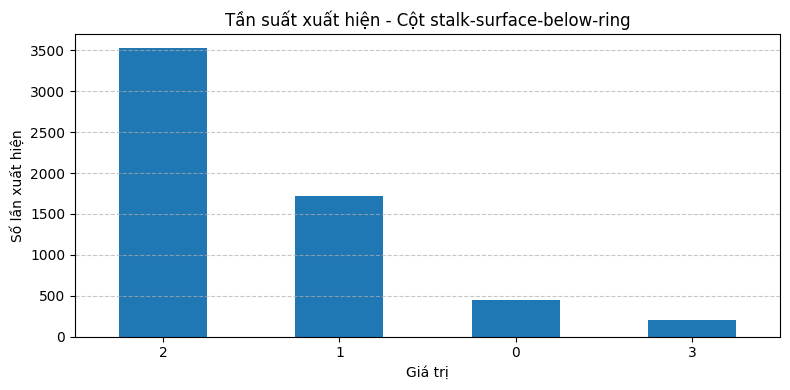

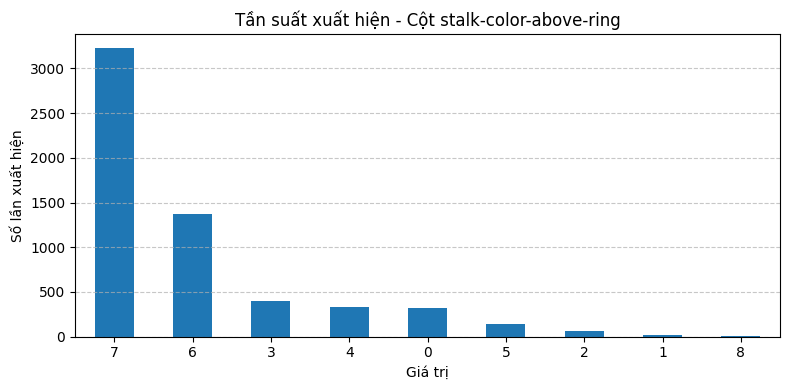

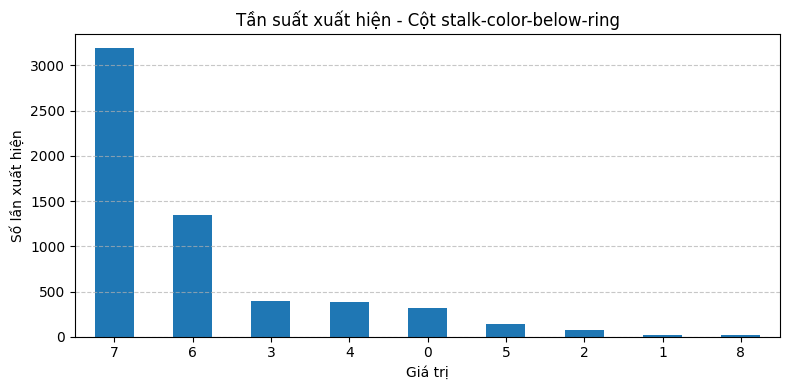

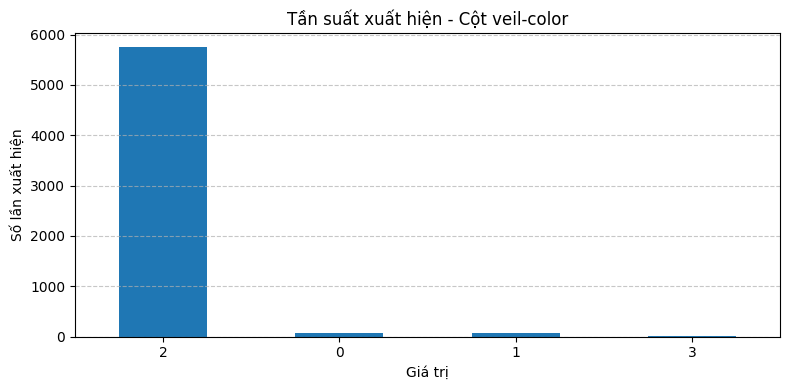

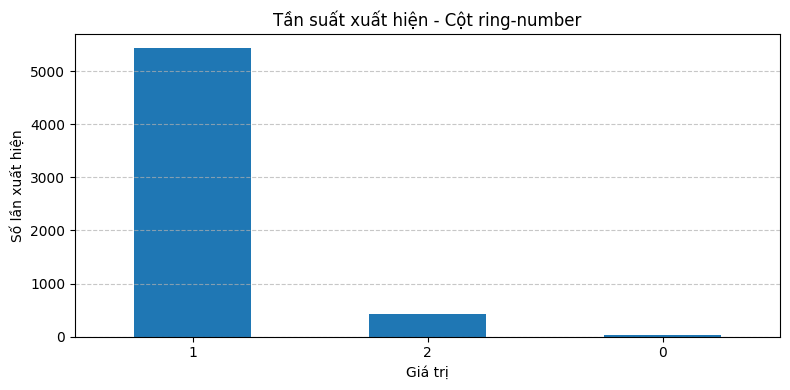

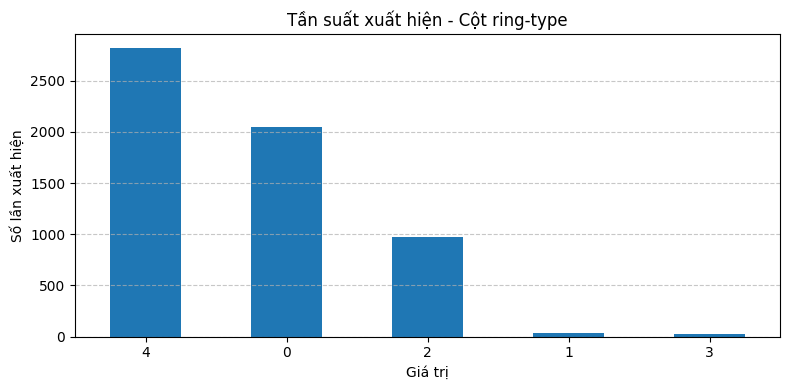

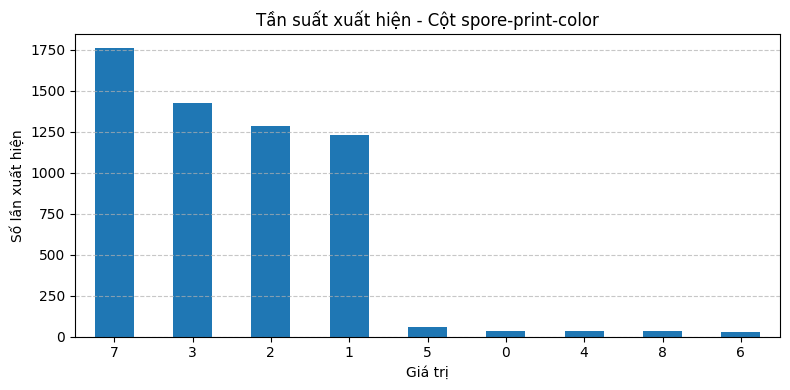

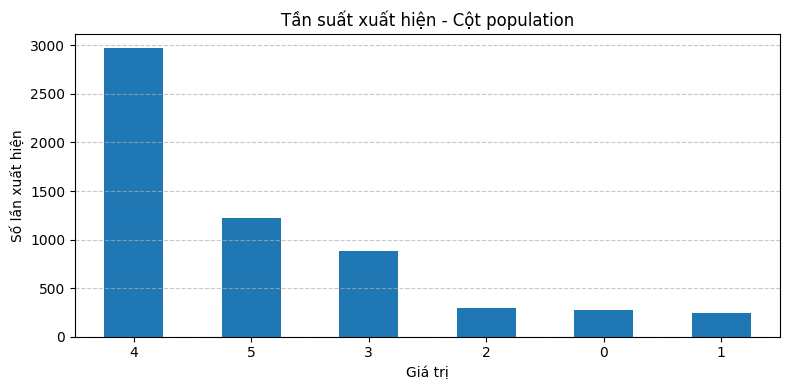

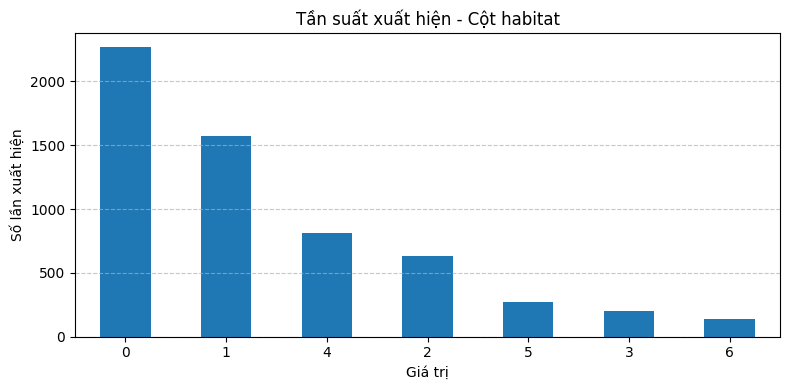

In [15]:
for cols in X_train.columns:
    plt.figure(figsize=(8,4))
    X_train[cols].value_counts().plot(kind='bar')
    plt.title(f'Tần suất xuất hiện - Cột {cols}')
    plt.xlabel('Giá trị')
    plt.ylabel('Số lần xuất hiện')
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# A47126: Decision Tree


1. Import thư viện mô hình & các thư viện cần thiết khác

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV

2. Huấn luyện mô hình

In [17]:
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier()

3. Dự đoán

In [18]:
y_val_pred = dec_tree.predict(X_val)
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       421
           1       1.00      1.00      1.00       392

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



4. Tối ưu hóa mô hình

5. Đánh giá mô hình (LƯU Ý: giảm False Negative) & phải có Confusion Matrix, AUC

# A47047: Logistics Regression

1. Import thư viện mô hình & các thư viện cần thiết khác

2. Huấn luyện mô hình

3. Dự đoán

4. Tối ưu hóa mô hình

5. Đánh giá mô hình (LƯU Ý: Dùng Recall để giảm False Negative) & phải có Confusion Matrix, AUC

# A49569: K-nearest neighbors

1. Import thư viện mô hình & các thư viện cần thiết khác

2. Huấn luyện mô hình

3. Dự đoán

4. Tối ưu hóa mô hình

5. Đánh giá mô hình (LƯU Ý: Dùng Recall để giảm False Negative) & phải có Confusion Matrix, AUC

# A49002: Bernoulli, Categorical

1. Import thư viện mô hình & các thư viện cần thiết khác

2. Huấn luyện mô hình

3. Dự đoán

4. Tối ưu hóa mô hình

5. Đánh giá mô hình (LƯU Ý: Dùng Recall để giảm False Negative) & phải có Confusion Matrix, AUC

# A48572: Gaussian, Multinomial

1. Import thư viện mô hình & các thư viện cần thiết khác

2. Huấn luyện mô hình

3. Dự đoán

4. Tối ưu hóa mô hình

5. Đánh giá mô hình (LƯU Ý: Dùng Recall để giảm False Negative) & phải có Confusion Matrix, AUC

# Lưu code

In [19]:
# Viết xong: Ctrl + S
# Sau đó
# Mở terminal lên: Ctrl + ~
# Copy câu này vào: git add . && git commit -m "Up" && git push